In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module, which can be installed with a simple:



In [60]:
!pip install CFEDemands --pre

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet can be found at
[https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/](https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/).

This spreadsheet consists of two worksheets, labeled &ldquo;Expenditures&rdquo;
and &ldquo;Household Characteristics&rdquo;, respectively.

Each worksheet has the initial three columns labeled &ldquo;j&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;j&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Malawi&rdquo;).

The triple (j,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet should
have one column for each category of expenditures (e.g., &ldquo;Rice&rdquo;, &ldquo;Goat
meat&rdquo;, &ldquo;Millet&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data allow, I recommend
constructing observables that match what I have in the ICRISAT data:
namely numbers of &ldquo;Men&rdquo;, &ldquo;Women&rdquo;, &ldquo;Boys&rdquo; and &ldquo;Girls&rdquo;; also the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Result Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Indian ICRISAT example that I wish to work
through.



In [61]:
Sheets = {'Copy of Ethiopia':'1ksStdDOFlwiy8HBmvURNxcEgz4-Pn8hYFNoS2ZsdGsk',
         # 'Your dataset':'Your google spreadsheet key',
         }

With the spreadsheet defined , grab it and define a couple of
dataframes. Note that the spreadsheet must be public for this approach
to work!



In [62]:
import pandas as pd
import numpy as np

# The function below adapted from Gianmario Spacagna's suggestion at
# https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
def dataframe_from_gspreadsheet(sheet_name, key):
    """Transform public google spreadsheet into pandas.DataFrame."""
    
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))

    df = pd.read_csv(url)

    return df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

# Change 'ICRISAT' to key of your own sheet in Sheets, above
x = dataframe_from_gspreadsheet("Expenditures", Sheets['Copy of Ethiopia'])

# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = dataframe_from_gspreadsheet("HH Characteristics", Sheets['Copy of Ethiopia'])

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# Take logs of expenditures; call this y
y = np.log(x.replace(0,np.nan).set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

This gives a dataframe of household characteristics $z$ with a simple structure.



In [63]:
z.head()

M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  \
j            t    m                                                           
1.010102e+12 2011 1      0      1       1        1        0        1      0   
                  1      0      0       2        0        0        1      0   
                  1      0      0       0        0        0        0      0   
                  1      0      0       0        0        0        0      0   
                  1      0      0       0        0        0        0      1   

                     F 0-3  F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
j            t    m                                                          
1.010102e+12 2011 1      0      0       1        0        0        1      1  
                  1      0      1       1        0        0        1      0  
                  1      0      0       0        0        0        0      1  
                  1      0      0       2        0        1        0      1  
                  1      0      0       1        1        0        1      0

Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [64]:
y.head()

Field Pea  Banana  Barley  Beef  Beer  Boye/Yam  Bula  \
j            t    m                                                           
1.010102e+12 2011 1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   
                  1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   
                  1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   
                  1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   
                  1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   

                     Butter/ghee  Cassava  Chat / Kat  ...        Salt  \
j            t    m                                    ...               
1.010102e+12 2011 1          NaN      NaN         NaN  ...    0.000000   
                  1          NaN      NaN         NaN  ...   -0.693147   
                  1          NaN      NaN         NaN  ...   -0.693147   
                  1          NaN      NaN         NaN  ...   -0.693147   
                  1          NaN      NaN         NaN  ...   -2.995732   

                     Soft drinks/Soda   Sorghum     Sugar  Sweet potato  Tea  \
j            t    m                                                            
1.010102e+12 2011 1               NaN       NaN  2.890372           NaN  NaN   
                  1               NaN       NaN       NaN           NaN  NaN   
                  1               NaN       NaN  1.609438           NaN  NaN   
                  1               NaN  4.430817  2.890372           NaN  NaN   
                  1               NaN       NaN  2.890372           NaN  NaN   

                     Teff  Tella  Tomato  Wheat  
j            t    m                              
1.010102e+12 2011 1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  

[5 rows x 57 columns]

## Estimation



With nothing more than this, we can estimate the demand system.  This
happens in two steps.  The first is the &ldquo;reduced form&rdquo; step:



In [65]:
import cfe

result = cfe.Result(y=y,z=z)

This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [66]:
result

<xarray.Result>
Dimensions:           (i: 57, j: 5221, k: 14, m: 1, t: 3)
Coordinates:
  * j                 (j) float64 1.01e+12 1.01e+12 ... 1.501e+13 1.501e+13
  * t                 (t) int64 2011 2013 2015
  * m                 (m) int64 1
  * i                 (i) <U40 ' Field Pea' 'Banana' ... 'Tomato' 'Wheat'
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables:
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.0 0.0 0.0 0.0
    loglambdas        object None
    a                 object None
    yhat              object None
    ce                object None
    cehat             object None
    e                 object None
    delta_covariance  object None
    se_delta          object None
    se_beta           object None
    se_alpha          object None
    se_a              object None


### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [67]:
result.get_reduced_form()

After running this we can examine the estimated coefficients $\delta$:



In [68]:
result.delta.to_dataframe().unstack('k')

delta                                                    \
k                 F 0-3   F 14-18   F 19-30   F 31-50     F 4-8     F 51+   
i                                                                           
Banana        -0.027059  0.127943  0.127376  0.040900 -0.088672  0.031379   
Barley         0.068238  0.147928  0.146799  0.087745 -0.004624  0.020795   
Chat / Kat     0.139919 -0.033067  0.056858 -0.039781  0.112337 -0.042849   
Chick Pea     -0.056903  0.060853  0.081951  0.111645  0.089060  0.134926   
Coffee         0.011766  0.070644  0.137764  0.084155 -0.028449 -0.005868   
Eggs          -0.065673  0.099117  0.153586  0.088807 -0.044102  0.097493   
Haricot Beans  0.105120  0.068506  0.045819  0.123166  0.149587  0.153470   
Horsebeans     0.046967  0.104229  0.083262  0.053577  0.047248  0.062912   
Lentils        0.037970  0.062146  0.103450  0.116530  0.012632  0.035314   
Maize          0.172873  0.097802  0.106043  0.099046  0.162762  0.132282   
Milk           0.272527  0.168546  0.059741  0.057567  0.045150  0.115752   
Onion          0.005297  0.082836  0.162713  0.073631  0.017904 -0.024328   
Potato         0.058826  0.070117  0.094316  0.013883  0.036104  0.030062   
Salt           0.066494  0.054141  0.100361  0.074203  0.062496  0.015799   
Sorghum        0.055818  0.044285  0.023597 -0.006780  0.145863  0.024504   
Sugar          0.147896  0.051501  0.091852  0.087284  0.124109  0.052493   
Teff          -0.027817  0.139529  0.168125  0.192504  0.022656  0.046487   
Wheat          0.153714  0.119745  0.057070  0.076677  0.159650  0.116656   

                                                                           \
k                F 9-13     M 0-3   M 14-18   M 19-30   M 31-50     M 4-8   
i                                                                           
Banana        -0.028048 -0.003928  0.047722  0.107032  0.222512 -0.077383   
Barley         0.084397  0.051542  0.129229  0.084596  0.043236  0.003028   
Chat / Kat     0.042796  0.016721 -0.019331  0.148404  0.142536  0.067004   
Chick Pea      0.117251  0.020820  0.103682  0.132254  0.164943  0.067957   
Coffee         0.035577 -0.024629  0.038594  0.068290  0.131464  0.027696   
Eggs          -0.010293 -0.002503  0.051481  0.106363  0.214755 -0.077911   
Haricot Beans  0.090316  0.086266  0.164751  0.119508  0.055394  0.133051   
Horsebeans     0.080657  0.035181  0.152583  0.164300  0.114631  0.081298   
Lentils        0.068968 -0.017089  0.076964  0.108282  0.183772  0.064616   
Maize          0.127887  0.132680  0.132356  0.158616  0.196889  0.198975   
Milk           0.020666  0.221293  0.113216 -0.054425  0.109963  0.131598   
Onion          0.017083  0.014936  0.062966  0.097336  0.128966 -0.015830   
Potato         0.070396  0.067464  0.059983  0.080194  0.121788  0.045442   
Salt           0.096027  0.057420  0.055597  0.087830  0.067552  0.068630   
Sorghum        0.178092  0.092590  0.112468  0.063177  0.081297  0.217124   
Sugar          0.088044  0.102092  0.087675  0.075314  0.027214  0.090303   
Teff           0.054894  0.002112  0.112681  0.215850  0.287857  0.048388   
Wheat          0.096595  0.168238  0.183283  0.116983  0.129459  0.135877   

                                   
k                 M 51+    M 9-13  
i                                  
Banana         0.040657 -0.065405  
Barley         0.006790 -0.045288  
Chat / Kat     0.136953 -0.008278  
Chick Pea      0.173110  0.098854  
Coffee         0.107656 -0.002735  
Eggs           0.042479 -0.052257  
Haricot Beans  0.236898  0.098284  
Horsebeans     0.125866  0.101426  
Lentils        0.186755  0.000453  
Maize          0.277913  0.168461  
Milk           0.238169 -0.052963  
Onion          0.076942 -0.023046  
Potato         0.098212  0.058496  
Salt           0.093115  0.068071  
Sorghum        0.197439  0.175991  
Sugar          0.100836  0.039095  
Teff           0.175043  0.059310  
Wheat          0.168281  0.145508

Also the good-time constants $a_{it}$:



In [69]:
result.a.to_dataframe().unstack('i')

a                                                     \
i         Banana    Barley Chat / Kat Chick Pea    Coffee      Eggs   
t    m                                                                
2011 1  1.429516  2.439033   3.856746  2.168238  2.731575  2.240898   
2013 1  1.768855  2.411033   3.975752  2.026583  2.614560  2.502875   
2015 1  2.216634  2.572497   4.203768  2.304225  2.673433  2.653195   

                                                                         \
i      Haricot Beans Horsebeans   Lentils     Maize      Milk     Onion   
t    m                                                                    
2011 1      2.123182   2.359229  2.371285  2.698301  2.765563  1.790550   
2013 1      2.060201   2.056598  2.372281  2.530685  2.783168  1.933638   
2015 1      2.065178   2.493013  3.016687  2.478175  2.997470  2.099947   

                                                                    
i         Potato      Salt   Sorghum     Sugar      Teff     Wheat  
t    m                                                              
2011 1  1.798336  0.366650  2.821091  2.306213  3.369860  3.086365  
2013 1  1.919250  0.590867  2.866917  2.252144  3.477928  2.976386  
2015 1  2.143706  0.657061  2.882081  2.227620  3.909836  3.015829

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [70]:
result.get_beta().to_dataframe()

,beta
i,
Banana,0.712459
Barley,1.463645
Chat / Kat,0.777367
Chick Pea,1.146119
Coffee,0.576001
Eggs,0.367746
Haricot Beans,1.077818
Horsebeans,0.941349
Lentils,0.658997


That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



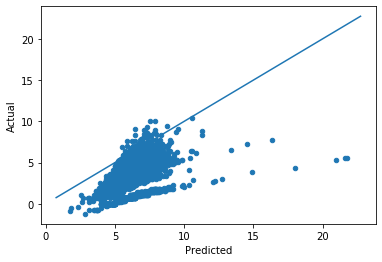

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])